# Bay Wheels 2019 Exploration  — Communicate Data Findings Project
## by Juan Daniel Alonso 

### Table of contents:

<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#polivariate">Multivariate Exploration</a></li>
</ul>




<a id='wrangling'></a>

## Preliminary Wrangling

> Bay Wheels (formerly Ford Go) is a bike sharing service operated by Lyft in the San Francisco Bay, at the time this project was written, there were stations in San Francisco, San José and in the East Bay (Berkeley, Oakland, Emeryville). In this project we will be working with Bay Wheels' 2019 data which we accesed [here]( https://www.lyft.com/bikes/bay-wheels/system-data)


This first section is divided into three subsections: 


<ul>
<li><a href="#gathering">Gathering</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>

</ul>



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

<a id='gathering'></a>
### Gathering

We have manually downloaded 2019's 12 CSVs into our computer from [here](https://s3.amazonaws.com/baywheels-data/index.html) and now we want to merge them and convert them to a DataFrame.

In [2]:
# List the csv archives

os.listdir()

['.ipynb_checkpoints',
 '201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 'Fordgo_exploration.csv',
 'Fordgo_Exploration.html',
 'Fordgo_Exploration.ipynb',
 'output_toggle.tpl',
 'readme.md',
 'slide_deck_Juan_Daniel_Alonso.ipynb',
 'slide_deck_Juan_Daniel_Alonso.slides.html']

In [3]:
# Read monthly CSVs into DataFrame an concatenate them into a yearly Dataframe

pattern = '*tripdata.csv'

csvs = glob.glob(pattern)


frames = []

for file in csvs:
    df = pd.read_csv(file, low_memory=False)
    frames.append(df)
    

fordgo = pd.concat(frames, ignore_index=True)

C:\Users\judaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


<a id='assesing'></a>

### Assessing

The dataset collected is big (more than 2.5 millon observations) and we want to familiarize ourselves with its structure and content before start working with it.

In [4]:
#Show 3 random rows

fordgo.sample(3)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1934278,3271,No,326,256.0,37.875112,-122.260553,Hearst Ave at Euclid Ave,2019-10-31 17:17:59.6860,NaN,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2019-10-31 17:12:32.9350,Subscriber
1982910,12044,No,968,115.0,37.765026,-122.398773,Jackson Playground,2019-10-24 21:34:15.9530,NaN,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-10-24 21:18:07.3440,Subscriber
718760,595,No,314,244.0,37.873676,-122.268487,Shattuck Ave at Hearst Ave,2019-04-17 12:33:31.4410,NaN,243.0,37.869360,-122.254337,Bancroft Way at College Ave,2019-04-17 12:28:16.6250,Subscriber


In [5]:
fordgo.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null object
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null object
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
# Are there duplicates?

fordgo.duplicated().sum()

0

In [7]:
# Describe numerical variables 

fordgo.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [8]:
# Show columns with nulls
fordgo.isna().any()

bike_id                    False
bike_share_for_all_trip     True
duration_sec               False
end_station_id              True
end_station_latitude       False
end_station_longitude      False
end_station_name            True
end_time                   False
rental_access_method        True
start_station_id            True
start_station_latitude     False
start_station_longitude    False
start_station_name          True
start_time                 False
user_type                  False
dtype: bool

#### Individual columns assessing

**Bike_share_for_all_trip.** [Bike Share for All](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all) is a Bay Wheels program designed for recipients of certain social allowances.

We have seen that there are some nulls in this column and we want to investigate it.

In [9]:
# Count unique values

fordgo.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [10]:
# How many observations null observations are there?

fordgo.bike_share_for_all_trip.isnull().sum()

243259

In [11]:
# Which percentage of  observations has null for bike_share

fordgo.bike_share_for_all_trip.isnull().sum() / fordgo.shape[0] * 100

9.703256862930463

In [12]:
# Show the rows with nulls ordering them by start_time

fordgo[fordgo.bike_share_for_all_trip.isnull()].sort_values(by=['start_time'])

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1244296,678749,NaN,1060,NaN,37.343669,-121.914823,NaN,2019-06-10 11:30:50,app,NaN,37.343699,-121.914881,NaN,2019-06-10 11:13:10,Subscriber
1244287,678749,NaN,138,NaN,37.343697,-121.914921,NaN,2019-06-10 12:27:44,app,NaN,37.343662,-121.914887,NaN,2019-06-10 12:25:26,Subscriber
1244299,678749,NaN,61,NaN,37.343720,-121.914910,NaN,2019-06-10 12:49:42,app,NaN,37.343713,-121.914905,NaN,2019-06-10 12:48:40,Subscriber
1244293,678749,NaN,195,NaN,37.343677,-121.914877,NaN,2019-06-10 13:08:44,app,NaN,37.343681,-121.914960,NaN,2019-06-10 13:05:29,Subscriber
1244291,678749,NaN,602,422.0,37.336775,-121.909149,Stockton Ave at Lenzen Ave,2019-06-10 13:32:12,app,NaN,37.343681,-121.914913,NaN,2019-06-10 13:22:10,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356907,11683,NaN,782,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2020-01-01 00:09:36.7050,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-12-31 23:56:34.4620,Customer
2356906,11020,NaN,781,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2020-01-01 00:09:41.5450,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-12-31 23:56:40.3240,Customer
2356911,12734,NaN,185,75.0,37.773793,-122.421239,Market St at Franklin St,2020-01-01 00:00:07.4940,NaN,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-12-31 23:57:01.5510,Customer
2356904,11448,NaN,1050,294.0,37.327581,-121.884559,Pierce Ave at Market St,2020-01-01 00:17:08.1880,NaN,473.0,37.309014,-121.900011,Willow St at Blewett Ave,2019-12-31 23:59:37.2060,Customer


Null values started appearing in June

It looks like all missing bike_share_for_all_trip are happening after June, It has probably to do with all the new changes (dockless stations, Rebranding into Bay Wheels, etc.) which happened after 2019, we do not need this columns so we will delete it. w

**Rental_access_method**

In [13]:
#how many nulls there are

fordgo.rental_access_method.isnull().sum()

2386145

In [14]:
#how many not nulls there are

fordgo.rental_access_method.notnull().sum()

120838

In [15]:
# Percentage of total observations were rental access is not null
fordgo.rental_access_method.notnull().sum() /fordgo.shape[0] * 100

4.820056617855007

In [16]:
# Show NOT null rows ordering them by start time
fordgo[fordgo.rental_access_method.notnull()].sort_values(by=['start_time']).head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1244296,678749,NaN,1060,NaN,37.343669,-121.914823,NaN,2019-06-10 11:30:50,app,NaN,37.343699,-121.914881,NaN,2019-06-10 11:13:10,Subscriber


In [17]:
fordgo[fordgo.bike_share_for_all_trip.isnull()]['rental_access_method'].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [18]:
# How many rows is rental access NOT null and bike_share for all is null

fordgo[(fordgo.rental_access_method.notnull()) & (fordgo.bike_share_for_all_trip.isnull())].shape[0]

120838

In [19]:
# How many rows is rental access null and bike_share for all is null

fordgo[(fordgo.rental_access_method.isnull()) & (fordgo.bike_share_for_all_trip.isnull())].shape[0]

122421

In [20]:
# Percentage of missing bike_share_for_all which is explained by rental access not being null

fordgo[(fordgo.rental_access_method.notnull()) & (fordgo.bike_share_for_all_trip.isnull())].shape[0] / fordgo.bike_share_for_all_trip.isnull().sum()

0.4967462663251925

In [21]:
fordgo[(fordgo.rental_access_method.isnull()) & (fordgo.bike_share_for_all_trip.isnull())].sort_values(by=['start_time'])

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2479301,1071,NaN,209,234.0,37.778058,-122.225400,Fruitvale Ave at International Blvd,2019-12-01 00:03:54.8360,NaN,237.0,37.775232,-122.224498,Fruitvale BART Station,2019-12-01 00:00:25.3360,Customer
2479299,10242,NaN,682,109.0,37.763316,-122.421904,17th St at Valencia St,2019-12-01 00:15:09.3520,NaN,130.0,37.757704,-122.391885,22nd St Caltrain Station,2019-12-01 00:03:46.6890,Customer
2479298,9787,NaN,720,387.0,37.739813,-122.425523,Randall St at Chenery St,2019-12-01 00:19:45.0080,NaN,127.0,37.756708,-122.421025,Valencia St at 21st St,2019-12-01 00:07:44.8400,Customer
2479300,12086,NaN,305,296.0,37.325998,-121.877120,5th St at Virginia St,2019-12-01 00:14:53.5780,NaN,423.0,37.320316,-121.870099,South San Jose State (7th St at Humboldt St),2019-12-01 00:09:48.5620,Subscriber
2479297,2986,NaN,831,187.0,37.796248,-122.279352,Jack London Square,2019-12-01 00:27:31.1700,NaN,337.0,37.806970,-122.266588,Webster St at 19th St,2019-12-01 00:13:39.2220,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356902,9829,NaN,1275,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2020-01-01 00:17:21.9350,NaN,462.0,37.804223,-122.401643,Cruise Terminal at Pier 27,2019-12-31 23:56:05.9390,Customer
2356907,11683,NaN,782,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2020-01-01 00:09:36.7050,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-12-31 23:56:34.4620,Customer
2356906,11020,NaN,781,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2020-01-01 00:09:41.5450,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-12-31 23:56:40.3240,Customer
2356911,12734,NaN,185,75.0,37.773793,-122.421239,Market St at Franklin St,2020-01-01 00:00:07.4940,NaN,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-12-31 23:57:01.5510,Customer


In [22]:
fordgo[fordgo.start_time.str.contains('2019-12')].bike_share_for_all_trip.value_counts()

Series([], Name: bike_share_for_all_trip, dtype: int64)

Only 4% of the rows have a defined value for rental_access_method. In addition, these values begin to appear at the same time as the null values  
in the variable bike_share_for_all.

After a small analysis, we have noticed that, in all observations where the rental_access_method contains a value, the value of the bike_share_for_all variable **is null**, accounting for 50% of total missing values in the variable.


Both Variables are somehow related we don't know why, but we don't need them for our analysis so we are going to delete them

In [23]:
# Create a copyof the DataFrame and set start_time as index

fordgo_copy = fordgo.copy()

fordgo_copy['start_time'] = pd.to_datetime(fordgo_copy['start_time'])

fordgo_copy.index = fordgo_copy.start_time

fordgo_copy.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
start_time,,,,,,,,,,,,,,,
2019-01-31 17:57:44.613,4861,No,80825,196.0,37.808894,-122.25646,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber


**end_station_id, start_station_id**


In [24]:
# Number of null end_station_ids

fordgo.end_station_id.isnull().sum()

82902

In [25]:
# Number of null start_station_ids

fordgo.start_station_id.isnull().sum()

80734

In [26]:
# Number of null start_station_ids and # Number of null end_station_ids


len(fordgo[fordgo.start_station_id.isnull() & fordgo.end_station_id.isnull()])

63912

In [27]:
# Sample of missing stations

fordgo[fordgo.end_station_id.isnull()].sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2498952,998430,NaN,608,NaN,37.759366,-122.391412,NaN,2019-12-19 14:24:13,app,NaN,37.775034,-122.402316,NaN,2019-12-19 14:14:04,Subscriber
1489482,285897,NaN,1700,NaN,37.776931,-122.407853,NaN,2019-07-28 13:58:17,app,NaN,37.808245,-122.408287,NaN,2019-07-28 13:29:57,Subscriber
1420623,833957,NaN,258,NaN,37.338413,-121.884232,NaN,2019-07-04 19:50:09,app,NaN,37.333680,-121.885140,NaN,2019-07-04 19:45:51,Subscriber
2492360,839579,NaN,455,NaN,37.337116,-121.883106,NaN,2019-12-17 12:13:32,app,304.0,37.348759,-121.894798,Jackson St at 5th St,2019-12-17 12:05:57,Subscriber
1497112,226031,NaN,111,NaN,37.851148,-122.252592,NaN,2019-07-13 15:18:31,app,NaN,37.850319,-122.252200,NaN,2019-07-13 15:16:39,Subscriber


Text(0.5, 1.0, 'Not Nulls')

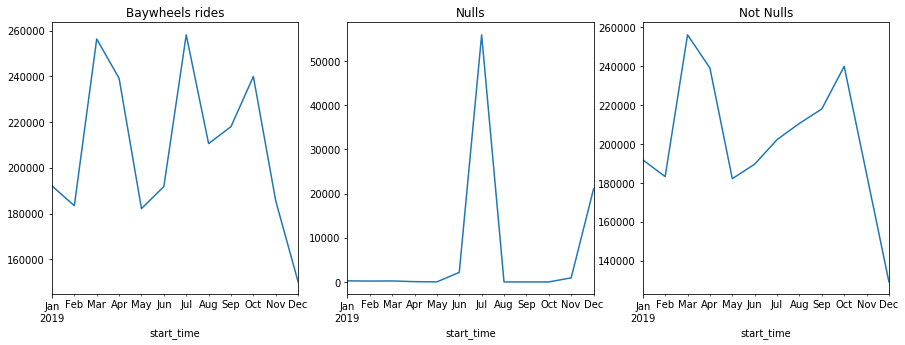

In [28]:
# PLot distribution of total rides, distribution of rides when start_station is null distribution of values when start station not null

plt.figure(figsize =[15, 5])

plt.subplot(1, 3, 1)
fordgo_copy.resample('M')['start_station_latitude'].count().plot()
plt.title('Baywheels rides')



plt.subplot(1, 3, 2)
fordgo_copy[fordgo_copy['start_station_id'].isnull()].resample('M')['start_station_latitude'].count().plot()
plt.title('Nulls')


plt.subplot(1, 3, 3)
fordgo_copy[fordgo_copy['start_station_id'].notnull()].resample('M')['start_station_latitude'].count().plot()
plt.title('Not Nulls')




In [29]:
fordgo_copy[fordgo_copy['start_station_id'].isnull()].resample('M')['start_station_longitude'].count()


start_time
2019-01-31      248
2019-02-28      197
2019-03-31      221
2019-04-30       64
2019-05-31       15
2019-06-30     2160
2019-07-31    55887
2019-08-31        0
2019-09-30        0
2019-10-31        0
2019-11-30      923
2019-12-31    21019
Freq: M, Name: start_station_longitude, dtype: int64

In [30]:
fordgo_copy.resample('M')['start_station_longitude'].count()


start_time
2019-01-31    192082
2019-02-28    183412
2019-03-31    256299
2019-04-30    239111
2019-05-31    182163
2019-06-30    191772
2019-07-31    258102
2019-08-31    210563
2019-09-30    217986
2019-10-31    239895
2019-11-30    185496
2019-12-31    150102
Freq: M, Name: start_station_longitude, dtype: int64

The wrong data is concentrated in the months of **July** and **December** with up to a 20% of total observations missing this values.

After some reasearch in internet, we have found that those missing values are not wrong but they are due to the introduction of free floating new E-Bikes in the end of June which were withdrawn in August due to battery problems and reintroduced in December (More details and links of newspapers explaining it below).


> At the end of [June and through all July, Lyft introduced stationless e-bikes in San Francisco](https://techcrunch.com/2019/07/21/lyft-e-bikes-san-francisco/) , all those bikes were [retired at the end of July](https://techcrunch.com/2019/07/31/lyft-pulls-e-bikes-in-light-of-apparent-battery-fires/), due to some problem with the batteries. Lyft [reintroduced the e-bikes in December](https://techcrunch.com/2019/12/23/after-battery-fires-lyfts-e-bikes-are-back-in-san-francisco/)

We have no way to know if missing bikes in the other months are some kind of tests getting ready for the introduction so we will leave the values like they are


#### quality:


missing values in
- bike_share_for_all_trip  
- rental_access_method  

- There are missing values as well in the station_id and station_name variables, related to free_floating bikes


create new columns_

- duration_min

Wrong data type:
- end_time
- start_time
- station ids (start and end)

different latitude and longitude for the same station



#### tidyness:

Latitud and longitued in separated cells make us more difficult to asses other station_related problems


<a id='cleaning'></a>

### Cleaning

In [31]:
fordgo_clean = fordgo.copy()

In [32]:
fordgo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


**Convert datatypes**


**Define:**

 Convert start_time and end_time to datetime

In [33]:
fordgo_clean[['start_time', 'end_time']].sample(2)

,start_time,end_time
1274118,2019-07-26 12:37:11.6150,2019-07-26 12:53:20.0500
88552,2019-01-21 09:45:13.7240,2019-01-21 10:00:26.4240


**Code:**

In [34]:
# Convert start time y endtime a timestamp

fordgo_clean['start_time'] = pd.to_datetime(fordgo_clean['start_time'])

fordgo_clean['end_time'] = pd.to_datetime(fordgo_clean['end_time'])



**Test:**

In [35]:
fordgo_clean['end_time'].sample(2)

1332170   2019-07-15 20:48:33.611
118239    2019-01-15 05:24:30.023
Name: end_time, dtype: datetime64[ns]

**Define:**

Convert usertype to ordered categorical dtype

In [36]:
# Cuts column ordered categoricalDtype

user = ['Customer', 'Subscriber']

ordered_user = pd.api.types.CategoricalDtype(ordered = True, categories = user)

fordgo_clean.user_type = fordgo_clean.user_type.astype(ordered_user)

In [37]:
fordgo_clean['start_time'].sample(2)

1430839   2019-07-26 19:12:17.000
1051114   2019-05-01 09:03:29.402
Name: start_time, dtype: datetime64[ns]

>The alert reader may have noticed that we have not converted the duration_sec column to type Timedelta.

>It's more difficult to plot graphs with timedelta than with integers so we've decided to leave the column like this, later we'll create a duration_min column with the duration in minutes

#### Drop wrong columns



In [38]:
fordgo_clean.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'rental_access_method', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

**Define:**

There are two columns whose information is incomplete and don't give any new insight so we will drop them:
- bike_share_for_all_trip
- rental_access_method

**Code:**

In [39]:
fordgo_clean.drop(['bike_share_for_all_trip', 'rental_access_method'], axis = 1, inplace = True)

**Test:**

In [40]:
fordgo_clean.columns

Index(['bike_id', 'duration_sec', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'end_time',
       'start_station_id', 'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

***Create a minutes column***

On the begining we thought about converting the duration_sec column to timedelta type. That will make it more difficult for us to plot it so we will just leave it as it is, instead, we are going to create a duration_min column to make easier to understand our work.


**Define:**

Create a duration_min column dividing duration_sec by 60

**Code:**

In [41]:
fordgo_clean['duration_min'] = fordgo_clean['duration_sec'] /60 

**Test:**

In [42]:
fordgo_clean[['duration_min', 'duration_sec']].sample(2)

,duration_min,duration_sec
1131487,5.066667,304
2263839,8.533333,512


### What is the structure of your dataset?

>  The dataset consists in 2,506,983 individual travels described in 14 observations.

### What is/are the main feature(s) of interest in your dataset?

> We are interested in knowing the usage patterns of Bay Wheels users in San Francisco. When, how  and how much they use the service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We will mostly work with duration_min, start_time and user_type variables.

In [43]:
fordgo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_min               float64
dtypes: category(1), datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 251.0+ MB


<a id='univariate'></a>


## Univariate Exploration

We will first analyze the variables of interest separately.

We want to know the distribution in our dataset of the following variables:

User type, trip duration, starting time and yearly fluctuations in usage.


**How many rides are attributed to each user type?**

There are two user type segments:

Customer  --> This is a casual user.

Subscriber --> This is somebody who is paying for a monthly membership.

We would like to know which group has used our bikes the most:

''

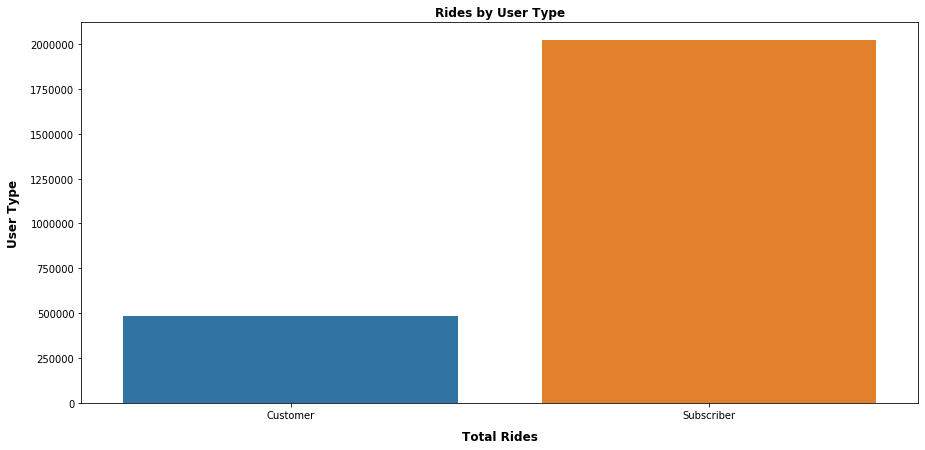

In [44]:
# Bar Plot showing rides by user type
plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)

sb.countplot(data= fordgo_clean, x='user_type')

plt.title('Rides by User Type', weight='bold', size=12)

plt.ylabel('User Type', labelpad=10, weight='bold', size=12)

plt.xlabel('Total Rides', labelpad=10, weight='bold', size=12)
;

80% of the rides in our data are attributed to the 'Subscriber' segment.

**How long does the typical ride last?**

Does the typical user wander around the city for hours, or does he commute to work 4 blocks away?



In [45]:
# Convert duration_min Series to a numpy array to speed up the plotting process
duration_array = np.array(fordgo_clean.duration_min)




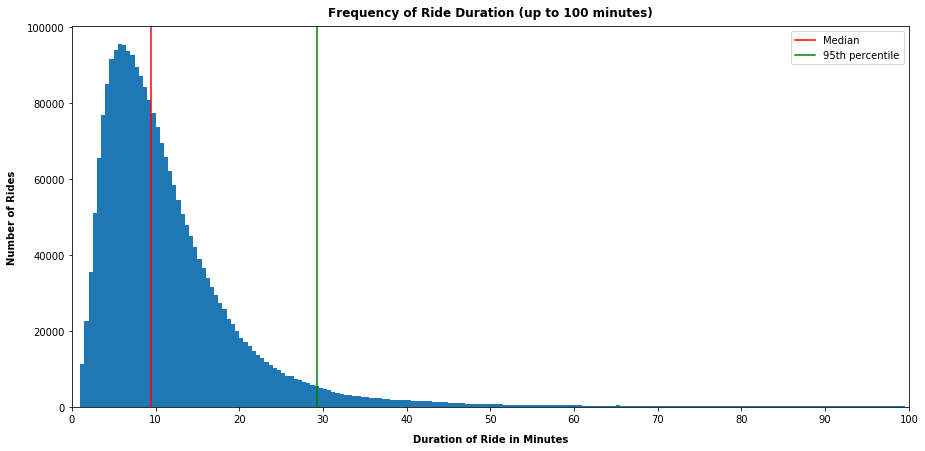

In [46]:
#Plot histogram to see the frecuency of travel duration
plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)

bin_edges = np.arange(0, 100, 0.5)

plt.hist(duration_array, bins= bin_edges)

plt.axvline(np.median(duration_array), color='r')


plt.axvline(np.quantile(duration_array, 0.95), color='g')

plt.title('Frequency of Ride Duration (up to 100 minutes)', pad=10, weight='bold')

plt.xlabel('Duration of Ride in Minutes', labelpad=10, weight='bold')

plt.ylabel('Number of Rides', labelpad=10, weight='bold')

plt.xticks([0,10,20,30,40,50,60,70, 80,90,100])
plt.xlim(0 ,100)

plt.legend(['Median', '95th percentile']);

It seems that trips are usually short.

The most common trip lasts about 8 minutes and half of the trips are shorter than 10 minutes. We can also see that 95% of the time, the bikes are rented for less than half an hour.

There is however a long tail of outliers, what has a strong effect in the centre measure (The median is around 10 minutes while the mean is more than 13 minutes, at the same level than the 70th percentile.

**How is the frequency distribution of rides which are longer than 30 minutes?**

As we saw in the graph above, the overwhelming majority of trips are less than 30 minutes long, there is however a long tail extending further right that we cannot appreciate due to the huge size of the curve belong 30 minutes. 

We want to plot frequencies above 50 minutes and below 200 minutes to know if they form a decreasing and continuous tail,  or on the contrary, consist of isolated values.

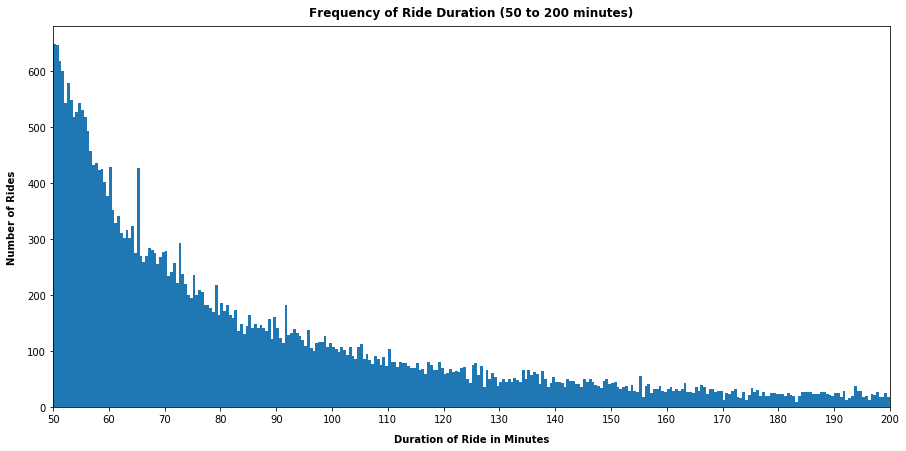

In [47]:
#Plot histogram to see the frecuency of travel duration
plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)

bin_edges = np.arange(50, 200 +0.5, 0.5)

plt.hist(duration_array, bins= bin_edges)

plt.axvline(duration_array.mean(), color='r')

plt.axvline(np.median(duration_array), color='y')

plt.axvline(np.quantile(duration_array, 0.95), color='g')

plt.title('Frequency of Ride Duration (50 to 200 minutes)', pad=10, weight='bold')

plt.xlabel('Duration of Ride in Minutes', labelpad=10, weight='bold')

plt.ylabel('Number of Rides', labelpad=10, weight='bold')

plt.xticks([50, 60, 70,80, 90,  100,110,120,130,140,150,160,170, 180,190,200])
plt.xlim(50, 200);

Trips of more than 50 minutes - which make up about 1% of the data - are distributed evenly across the graph, forming a long tail that gradually narrows.

**How is the frequency distribution of rides which are longer than 200 minutes?**

The previous graph only showed the frequency distribution of trips of up to 200 minutes. Now we want to see if the frequencies of trips longer than 200 minutes - 0.20% of the data - are distributed evenly up to the highest value.

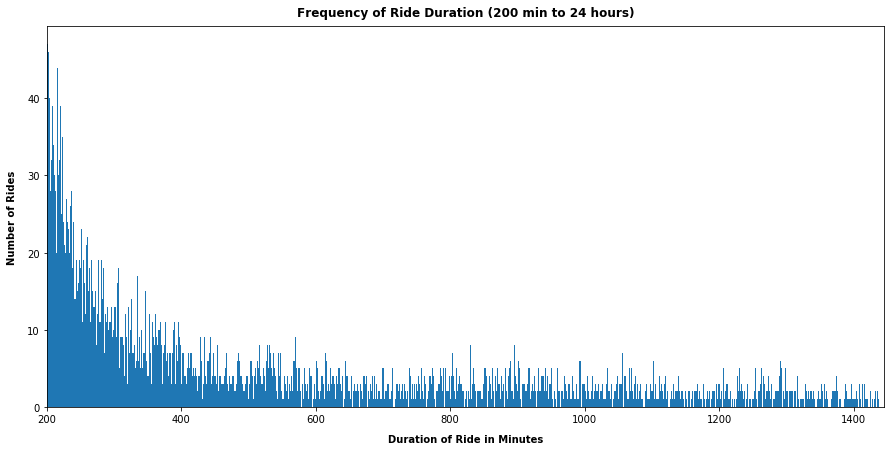

In [48]:
#Plot histogram to see the frecuency of travel duration
plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)


bin_edges = np.arange(200, 1440 +5, 1)

plt.hist(duration_array, bins= bin_edges)

plt.title('Frequency of Ride Duration (200 min to 24 hours)', pad=10, weight='bold')

plt.xlabel('Duration of Ride in Minutes', labelpad=10, weight='bold')

plt.ylabel('Number of Rides', labelpad=10, weight='bold')

plt.xlim(200, 1445);

We can say that frequencies above 200 minutes form a continuous narrowing line which reaches until the 1440 minutes value (24 hours)

After that line, there is only one data point, a 10 days rental that we will delete

**Delete the last data point**

In [49]:
# Show observation with duration min longer than 24 hours
fordgo_clean[fordgo_clean.duration_min > 1440]

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_min
2481276,614329,912110,NaN,37.327656,-121.868598,NaN,2019-12-30 12:37:26,NaN,37.323757,-121.878614,NaN,2019-12-19 23:15:36,Customer,15201.833333


In [50]:
# Drop Rows with duration_min bigger than 24 hours
fordgo_clean.drop(fordgo_clean[fordgo_clean.duration_min > 1440].index, inplace = True)
fordgo_clean[fordgo_clean.duration_min > 1440].index

Int64Index([], dtype='int64')

**How is the duration distributed?**

In the previous charts, we saw that the frequency distribution showed a big concentration of short rides and a long tail of longer ones.

We would like to know how are the rides distributed in three different segments:

- Shorter than 15 min
- Between 15 min and half an hour
- Longer than 30 min

In [51]:
# Create column 
bin_names = ['less than 15 m', '15 to 30 min', 'more than 30 min']

bin_edges = [0, 15, 30, fordgo_clean['duration_min'].max()]

fordgo_clean['duration_period'] = pd.cut(fordgo_clean['duration_min'], bin_edges, labels=bin_names)

fordgo_clean['duration_period'].head(5)

0    more than 30 min
1    more than 30 min
2    more than 30 min
3    more than 30 min
4    more than 30 min
Name: duration_period, dtype: category
Categories (3, object): [less than 15 m < 15 to 30 min < more than 30 min]

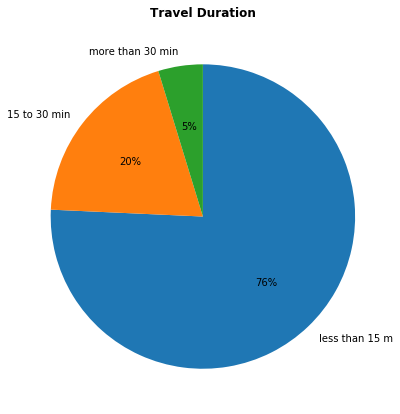

In [52]:
# Pie chart of travel duration categories

plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)
sorted_counts = fordgo_clean['duration_period'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.0f%%')

plt.title('Travel Duration', pad=10, weight='bold');

76 % of the rides are shorter than 15 minuties, 20% of them are between 15 min and half an hour and only 5% of them are longer than half an hour.

**At what hour are bikes rented?**

The short duration of the average trip makes us think that most travelers want to move from A to B in the shortest time possible.  These usage patterns may be related to people using Bay Wheels to go to work or college —rather than taking long recreational rides—, let's see if we can confirm this insight analyzing the start_time of the rides.

In [53]:
# Create new DataFrame grouped by hour of the day.

fordgo_clean_startind = fordgo_clean.set_index('start_time')
fg_hour_of_day = fordgo_clean_startind.groupby(fordgo_clean_startind.index.hour).count()['start_station_longitude']
fg_hour_of_day.head()

start_time
0    14686
1     8788
2     5682
3     2779
4     3442
Name: start_station_longitude, dtype: int64

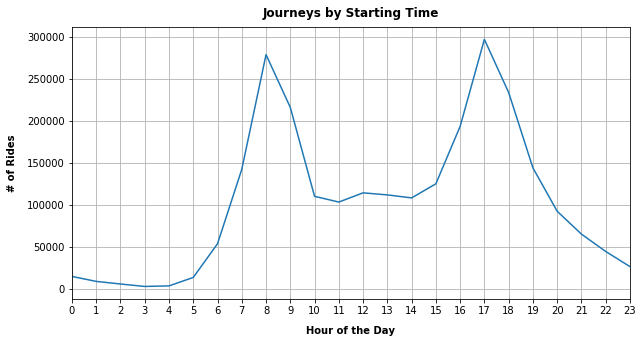

In [54]:
# Plot Journeys by Starting time

fg_hour_of_day.plot(figsize=[10,5])

plt.title('Journeys by Starting Time', pad=10, weight='bold')

plt.xlabel('Hour of the Day',labelpad=10, weight='bold')

plt.ylabel('# of Rides', labelpad=10, weight='bold')

plt.grid()

plt.xticks(np.arange(0, 24, 1));


As expected, the graph shows a bimodal behaviour, with one peak in the morning and another in the evening, suggesting work/school/college entry and exit times.


**How do rentals distribute across the year?**

We already know that the standard ride is short —15 min— and happens between 7 AM and 20 PM –rush hours at  8 AM and 17 PM— but, do they happen uniformly throughout the year?

In a colder city, we would expect bike travels dramatically decreasing in winter. Does it happen in San Francisco?

In [55]:
# Resample data by month and get the total frequency

fordgo_monthly_count = fordgo_clean.set_index('start_time').resample('M')['duration_min'].count() 


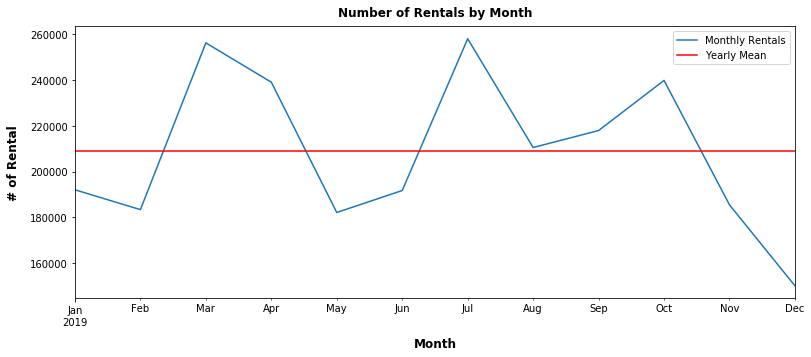

In [56]:
# Number of Rentals by Month


plt.figure(figsize=[10,5])

fordgo_monthly_count.plot()
plt.title('Number of Rentals by Month',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('# of Rental', labelpad=10, weight='bold', size=12)
plt.axhline(fordgo_monthly_count.mean(), color ='r')
plt.subplots_adjust(left=0, right=1)

plt.legend(['Monthly Rentals', 'Yearly Mean', ]);


The result is not what we expected. There are lows in Jan-Feb, May-June and Nov-Dec. It makes sense a decrease in winter months but that doesn't explain the huge drop in May-June.

After small research on the internet we found reasons which might explain what happened: 
- **Rebranding:** [Ford Go became Bay Wheels in June](https://techcrunch.com/2019/06/11/lyft-deploys-its-pink-wheeled-bikes-and-rebrands-ford-gobike-as-bay-wheels/)

- **Worst weather conditions**: apparently  [last May rained more than usual in San Francisco](https://www.sfgate.com/weather/article/san-francisco-bay-area-rain-storm-may-records-13853312.php),  [much more](https://www.sfgate.com/weather/article/May-San-Francisco-rainfall-total-above-average-13858927.php)
- **Lyft retired in April docked E-Bikes**: that caused an [availability issue](https://techcrunch.com/2019/07/21/lyft-e-bikes-san-francisco/). According to the [SFMTA (San Francisco Municipal Transportation Agency)](https://www.sfmta.com/blog/bike-share-update-bringing-back-reliable-service):
> “These new bikes will allow Lyft to address the severe bicycle availability issues that Bay Wheels has faced since Lyft removed e-bikes from service in April.” 

On the other hand, the peak in July is explained by the introduction of dockless e-Bikes and the big decrease in August is explained by the [withdrawal of those same e-bikes due to malfunctioning of batteries](https://www.theverge.com/2019/7/31/20749396/lyft-electric-bikes-pulled-san-francisco-battery-fires-motivate-bay-wheels)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the users are a subscriber and it is clear that the vast majority of the rides are purpose-related (get from A to B)  short rides,  50% of rides are shorter than 10 minutes and 95% of them are shorter than half-hour. The remaining 5% of them are a myriad of values descending in frequency, ranging from 30 minutes (the most) to the last one which is scratching the 24-hour barrier. Most travels happen around two peaks, one in the morning as people go to work (8 AM) and one in the evening (17 PM) as people leaves. Mean monthly rides are around 210,000 trips but this number fluctuates throughout the year


<a id='bivariate'></a>


## Bivariate Exploration

> We already know how our variables of interest behave separately. How do they behave together?
> Does the duration of the trips change depending on the month or the type of user? What are the most common duration and frequency?

**Does the ride duration change during the year?**

The travel duration might be a clear indication of weather effects in bike rental. In a not so cold city as San Francisco, short commuting travels might stay relatively stable,  however, longer pleasure rides should diminish, lowering the mean travel time.

On the other hand, we don't know how might these measures be affected by the introduction and withdrawal of the stationless e-bikes.

In [57]:
# Resample data by month and get the average median duration in minutes

fordgo_monthly_dmean = fordgo_clean.set_index('start_time').resample('M')['duration_min'].mean() 
fordgo_monthly_dmedian = fordgo_clean.set_index('start_time').resample('M')['duration_min'].median() 

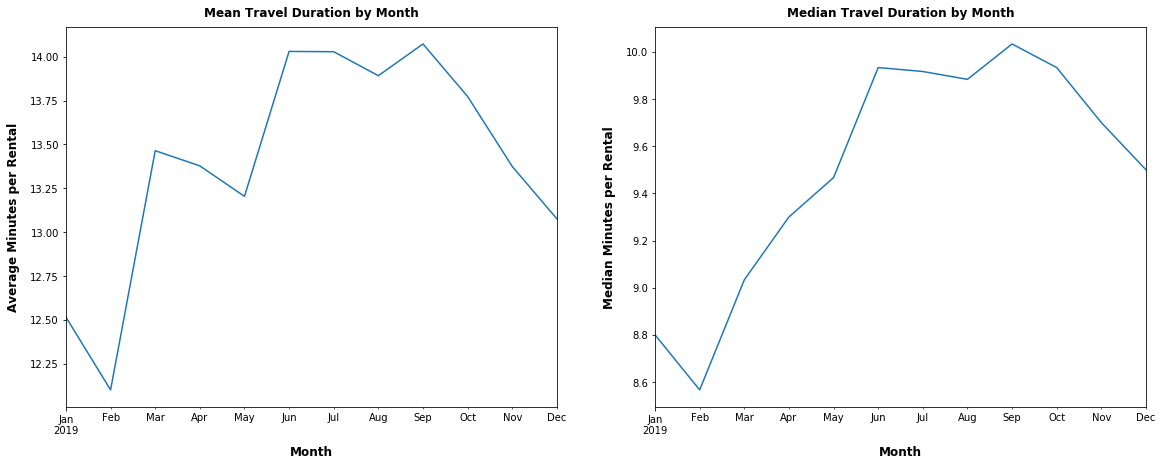

In [58]:
# Mean and Median Rental Duration

plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)


plt.subplot(1,2,1)
fordgo_monthly_dmean.plot()

plt.title('Mean Travel Duration by Month',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('Average Minutes per Rental', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)


plt.subplot(1,2,2)

fordgo_monthly_dmedian.plot()

plt.title('Median Travel Duration by Month',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('Median Minutes per Rental', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)



As we imagined, both graphs indicate lower values for the winter months and higher values for the warmer ones. 

The use of the bicycle is strongly dependent on the weather: in colder months, the bicycle is used just for practical purposes (commuting, going to the gym, etc.) while in summer, the distance for utilitarian travels expands ( i.e. visit your grandma who lives in the other side of the city) and also appears the leisure use (such as going for a ride along the seashore).

As well, we can glimpse the consequences of the introduction and later withdrawal of Dockless E-Bikes by looking at the peak and fall that occurs between June and August.

It is interesting to see that the turbulence of May we talked about above, had a stronger effect on the average, which falls half a minute compared to March, than on the median, which simply reduces its growth trend. This indicates a reduction in our long-tail of outliers (travels which take longer than an hour)

**Travel Duration by user type**

We already know that subscribers account for 80% of all rides, we know as well that the median travel time for all users is less 10 minutes and that most travels occur at commuting times.

Now we would like to know if the user type has some impact on the way how the bikes are used. We think that people that regularly use our bikes to commute are subscribers and thus, being commute travels shorter as pleasure ones, we could imagine that 

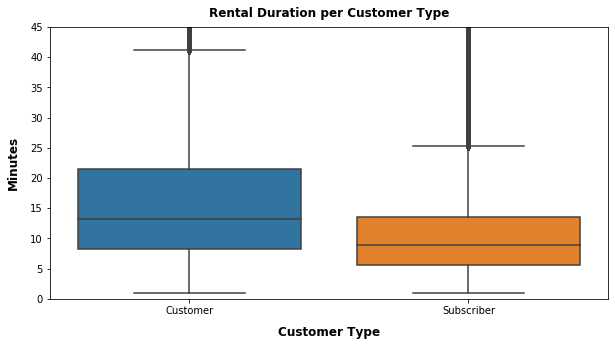

In [59]:
# Customer Type Analysis

plt.figure(figsize=[10, 5]).tight_layout(pad=10.0)

sb.boxplot(data = fordgo_clean, x = 'user_type', y = 'duration_min' )

plt.title('Rental Duration per Customer Type',pad=10, weight='bold', size=12)

plt.ylabel('Minutes', labelpad=10, weight='bold', size=12)

plt.xlabel('Customer Type', labelpad=10, weight='bold', size=12)

plt.ylim(0,45);


We can see that althought customer rides account for 1/5 of the total rides, the ride duration tend to be much larger for customers than for subscribers.


**What are the most common start_hour and duration for a ride?**

We already know that:

a) Trips are usually short and

b) Most of it occurs at rush hour.

What are the most common joint duration and start hour? We imagine that the most common ride will fall inside the two previously named scenarios, but we are sure that there will be a difference depending on the day of the week.

In [60]:
#  Create business_weekday column with values Workday / Weekend

weekday_bins = ['Workday', 'Weekend'] 

weekday_edges = [-1, 4, 6]

fordgo_clean['business_weekday'] = pd.cut(fordgo_clean.start_time.dt.weekday, bins=weekday_edges, labels=weekday_bins)

# Create a start_hour column

fordgo_clean['start_hour'] = fordgo_clean.start_time.dt.hour


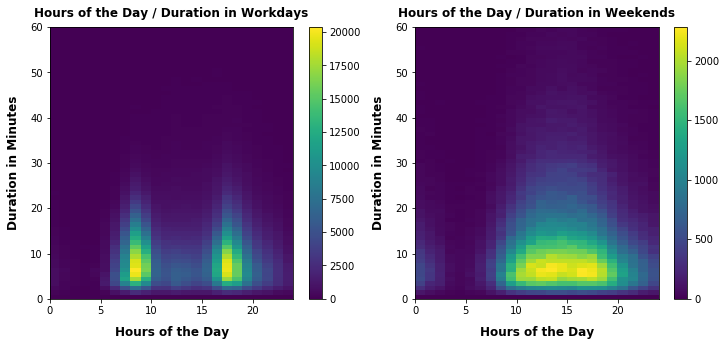

In [61]:
# Plot two heatmaps to express the most common relations between duration and start_hour: one of workdays and one of weekends


plt.figure(figsize=[12,5]).tight_layout(pad=20.0)


# Plot Workday hours/duration heatmap


plt.subplot(1,2,1)

plt.hist2d(fordgo_clean[fordgo_clean.business_weekday == 'Workday'].start_time.dt.hour, fordgo_clean[fordgo_clean.business_weekday == 'Workday'].duration_min,[24,60], [[0,24],[0,60]] )

plt.xlabel('Hours of the Day', labelpad=10, weight='bold', size=12)
plt.ylabel('Duration in Minutes', labelpad=10, weight='bold', size=12)

plt.title('Hours of the Day / Duration in Workdays', pad=10, weight='bold', size=12)

plt.colorbar()

# Plot Weekend hours/duration heatmap
plt.subplot(1,2,2)

plt.hist2d(fordgo_clean[fordgo_clean.business_weekday == 'Weekend'].start_time.dt.hour, fordgo_clean[fordgo_clean.business_weekday == 'Weekend'].duration_min,[24,60], [[0,24],[0,60]] )

plt.xlabel('Hours of the Day', labelpad=10, weight='bold', size=12)
plt.ylabel('Duration in Minutes', labelpad=10, weight='bold', size=12)

plt.title('Hours of the Day / Duration in Weekends', pad=10, weight='bold', size=12)

plt.colorbar();


As we imagined the most common start hour /duration during the week seems to 5 - 10 minutes ride at 8 AM and 17 PM.

On the other hand, on weekends the most common trips last between 5 and 10 minutes and occur from 10 in the morning to 8 in the evening. Another difference concerning the first graph is that the concentration is lower, and you can see wide clearings fading around the most common occurrences and - curiously - a more or less clear period between 12 and 1 in the morning.

It seems that some San Franciscans like to party on their bicycles!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We have seen that the travel patterns of our users change depending on the month of the year and on the service offered (dockless, e-bikes...). We could see as well that de duration of the ride is different for customers and subscribers.



<a id='multivariate'></a>


## Multivariate Exploration

> We have seen the bike usage throughout the year and between customer segments, now we would like to combine this analysis and see how different customers have used Bay Wheels in 2019

**Do ride starting times differ depending on the user type?**

We already know that Non-Subscribers' rides tend to be longer than Subscribers', how does it reflect in the hour of start?

In [62]:

#  Create DataFrame from Customer grouped by hour of day
startind_customer = fordgo_clean[fordgo_clean['user_type'] == 'Customer'].set_index('start_time')
fg_hour_of_day_customer = startind_customer.groupby(startind_customer.index.hour).count()['start_station_longitude']


#  Create DataFrame from Subscriber grouped by hour of day
startind_subscriber = fordgo_clean[fordgo_clean['user_type'] == 'Subscriber'].set_index('start_time')
fg_hour_of_day_subscriber = startind_subscriber.groupby(startind_subscriber.index.hour).count()['start_station_longitude']

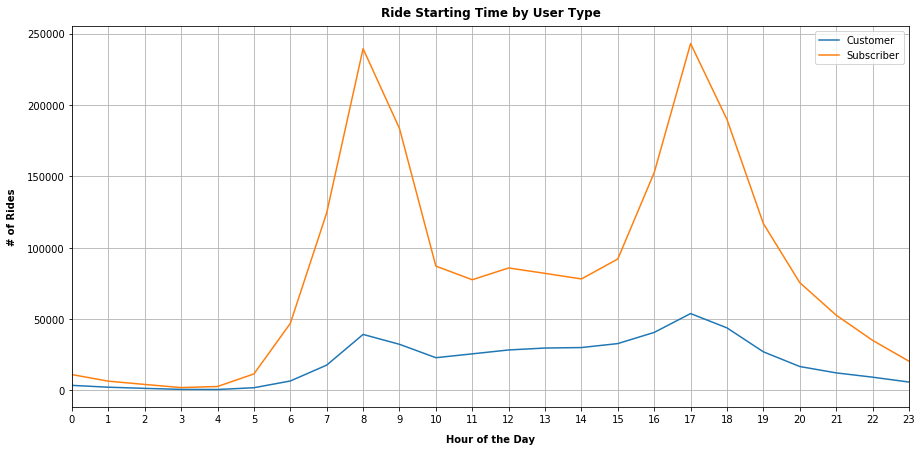

In [63]:
# Plot Journeys by Starting time

plt.figure(figsize=[15,7]).tight_layout(pad=10.0)


fg_hour_of_day_customer.plot()
fg_hour_of_day_subscriber.plot()


plt.title('Ride Starting Time by User Type', pad=10, weight='bold')

plt.xlabel('Hour of the Day',labelpad=10, weight='bold')

plt.ylabel('# of Rides', labelpad=10, weight='bold')

plt.grid()

plt.xticks(np.arange(0, 24, 1))

plt.legend(['Customer', 'Subscriber']);

Both user types show a similar bimodal structure with peaks around 8 AM and 17:00 PM with a plateau in the middle. The big difference is that, while Subscribers peaks are even —ranging around 240,000 rides— Customers have a lower morning peak —39,000 rides at 8 AM—, and higher values at 16, 17 and 18 PM —54,000 being the highest point at 17 PM, a 38% increase regarding the value at 8 AM—

**How does the number of rides change throughout the year depending on the user??**



In [64]:
# Filter rows with user type Customer, resample it by month and count frequencies
fordgo_monthly_customer_count = fordgo_clean[fordgo_clean.user_type == 'Customer'].set_index('start_time').resample('M')['duration_min'].count() 

# Filter rows with user type Subscriber, resample it by month and count frequencies
fordgo_monthly_subscriber_count = fordgo_clean[fordgo_clean.user_type == 'Subscriber'].set_index('start_time').resample('M')['duration_min'].count()

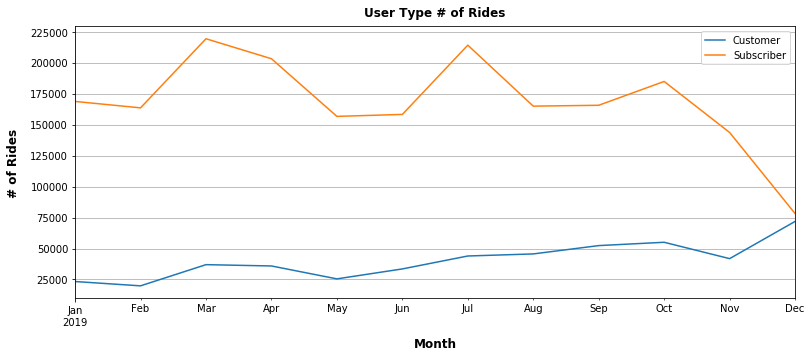

In [65]:
#Number of rides by user type throughout

plt.figure(figsize=[10,5]).tight_layout(pad=20)

#rides

fordgo_monthly_customer_count.plot()
fordgo_monthly_subscriber_count.plot()
plt.title('User Type # of Rides',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('# of Rides', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)
plt.grid()
plt.legend(['Customer', 'Subscriber']);

We can see that, while Subscriber's number of rides oscillates along the year and suffers a steep fall in November-December, the Non-Subscriber segment experiments a steady increase in the total number of rides, peaking in December and almost reaching for the first time the number of rides of the Non Subscriber segment, suggesting some kind of user transfer between both groups.

Another interesting fact to point out is that It seems that the segment of subscribers is much more sensitive to economic downturns than the segment of casual customers:

While the former suffer significant declines in May, June and August (due to the reasons mentioned above), in the Non-Subscriber segment there is only a small decline in May, followed by a rapid recovery in June, in July there is no decline but only a slowdown in growth.



**How does the duration by month change depending on the user segment?**

We have just seen what seems to be a transfer from users from the Subscriber to the Customer segment in December, if this was true, we should see some change in the user patterns.

In [66]:
# Filter rows with user type Customer, resample it by month and get mean duration

fordgo_monthly_customer = fordgo_clean[fordgo_clean.user_type == 'Customer'].set_index('start_time').resample('M')['duration_min'].mean() 

# Filter rows with user type Subscriber, resample it by month and get mean duration

fordgo_monthly_subscriber = fordgo_clean[fordgo_clean.user_type == 'Subscriber'].set_index('start_time').resample('M')['duration_min'].mean() 

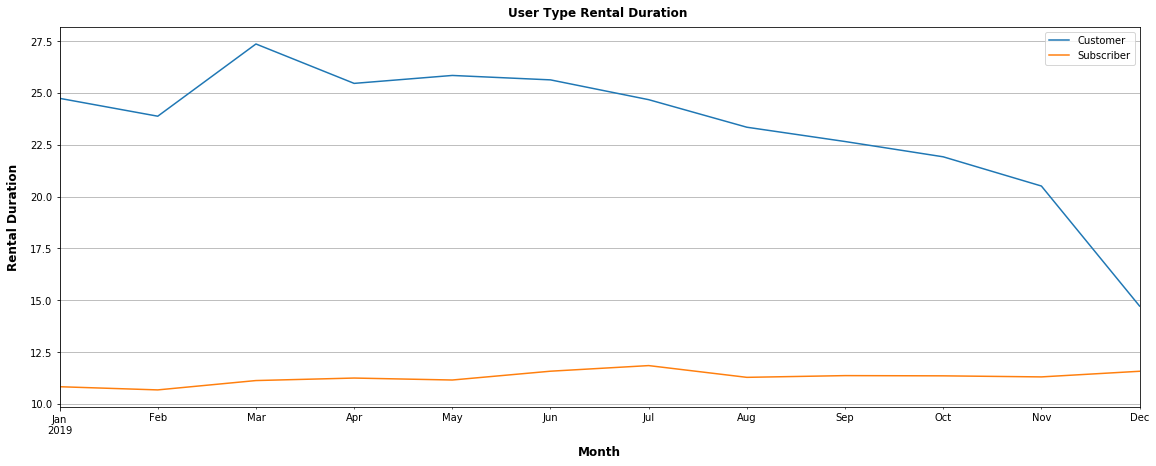

In [67]:
# Plot rental duration by user type

plt.figure(figsize=[15, 7]).tight_layout(pad=20)


fordgo_monthly_customer.plot()
fordgo_monthly_subscriber.plot()
plt.title('User Type Rental Duration ',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('Rental Duration', labelpad=10, weight='bold', size=12)
plt.grid()
plt.subplots_adjust(left=0, right=1)
plt.legend(['Customer', 'Subscriber']);

We can clearly see the huge drop on average time driven by bike-ride in the Customer segment is decaying since the middle of the year, but it is in December when it suffers its biggest drop, this dramatic change in use patterns strengthens our theory, that there is a transfer from Subscriber to Non-Subscriber in December.

We already knew that Fordgo subscribers were the segment with the most travellers, while they were the group of travellers with the least average rental time. Now we also know that they are the group most sensitive to changes in service and that the last few months of 2019 were catastrophic for service in general.


We do not know if what has happened in 2019 is a cyclical trend in the business or if, on the contrary, Fordgo has suffered a setback at the end of the year. What we can say is that ups and downs in the service provided by Lyft have harmed Baywheels' business potential that can be reduced with further planning for its future.

**Are there differences in bike usage depending on the user type AND the day of the week?**

As we saw above there is a clear difference between weekend and mid-week use. It also seems that Subscribers and Non-Subscribers ride our bikes at different times.

If we segment the data into 4 subgroups, how will they be different?

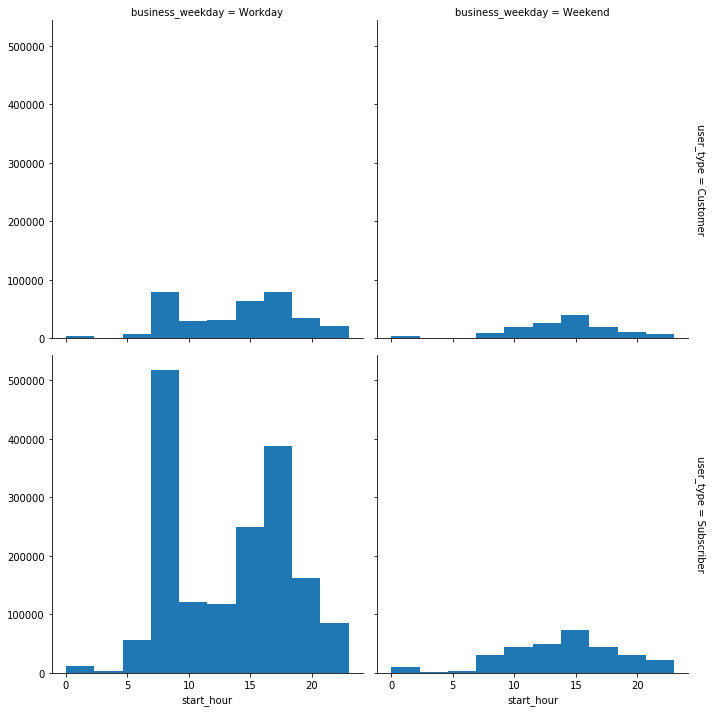

In [68]:
# Create a facetgrid with user_type in row and business_weekday in column.



g = sb.FacetGrid(data = fordgo_clean, col = 'business_weekday', row = 'user_type', height = 5, margin_titles = True);

g.map(plt.hist, 'start_hour');




It seems that both client segments share similar behaviour patterns both on weekdays - most often occurring around two rush hours - and on weekends with a near-normal distribution centred at 3pm.

The differences between the two groups appear to be in proportions, with subscribers appearing to travel overwhelmingly on weekdays while non-subscribers appear to travel equally every day. Let's check this out:

In [69]:
# Count total number of customer and subscriber trips as well as customer and subscriber trips on the weekend.

total_subscriber = len(fordgo_clean[ (fordgo_clean.user_type == 'Subscriber') ])
subscriber_workday = len(fordgo_clean[(fordgo_clean.business_weekday == 'Workday') & (fordgo_clean.user_type == 'Subscriber') ])

total_customer = len(fordgo_clean[ (fordgo_clean.user_type == 'Customer') ])
customer_workday =len(fordgo_clean[(fordgo_clean.business_weekday == 'Workday') & (fordgo_clean.user_type == 'Customer') ])

print('In the Subscriber segment {}'.format(round((subscriber_workday /total_subscriber)* 100))+ '% of travels happen in workdays' + ' while only {}'.format(round((customer_workday/total_customer) * 100)) + '% of customers trips happen in workdays')

In the Subscriber segment 85% of travels happen in workdays while only 72% of customers trips happen in workdays


The number of trips by subscribers is disproportionate on weekdays while customers seem to travel the same on weekdays as on weekends (72% is as well the number of workdays in the week)

In [70]:
fordgo_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 17 columns):
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_min               float64
duration_period            category
business_weekday           category
start_hour                 int64
dtypes: category(3), datetime64[ns](2), float64(7), int64(3), object(2)
memory usage: 294.1+ MB


In [71]:
fordgo_clean.to_csv('Fordgo_exploration.csv', index=False)

In [72]:
fordgo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 17 columns):
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_min               float64
duration_period            category
business_weekday           category
start_hour                 int64
dtypes: category(3), datetime64[ns](2), float64(7), int64(3), object(2)
memory usage: 294.1+ MB
